<a href="https://colab.research.google.com/github/sahikacelenk/PythonBootcamp_FinalProjects/blob/main/Project2_Netflix_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2**


> This project includes analysis and visualizations about IMDB scores, genres and runtime information of Netflix movies.


*   There are explanations about code blocks, so there is no extra documentation for the project.
*   After uploading the "csv" file to the colab files section, we worked on the project. 
*   There are many multiple information in Genre and Language columns. So we used ".str.contains" for filtering those columns.






In [ ]:
# First, we uploaded the csv file to colab files section.
# Importing the libraries and examining the first 5 rows
# After getting an error, we added encoding and engine parameters.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

netflix = pd.read_csv("NetflixOriginals.csv", encoding = 'unicode_escape', engine ='python', index_col = 0)
netflix.head()

,Genre,Premiere,Runtime,IMDB Score,Language
Title,,,,,
Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
The Open House,Horror thriller,"January 19, 2018",94,3.2,English
Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
# Examining the last 5 rows
netflix.tail()

,Genre,Premiere,Runtime,IMDB Score,Language
Title,,,,,
Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [ ]:
# Examining the general information about the Netflix dataframe
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, Enter the Anime to David Attenborough: A Life on Our Planet
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Genre       584 non-null    object 
 1   Premiere    584 non-null    object 
 2   Runtime     584 non-null    int64  
 3   IMDB Score  584 non-null    float64
 4   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 27.4+ KB


In [ ]:
# Checking for missing values. There are none.
netflix.isna().any()

Genre         False
Premiere      False
Runtime       False
IMDB Score    False
Language      False
dtype: bool

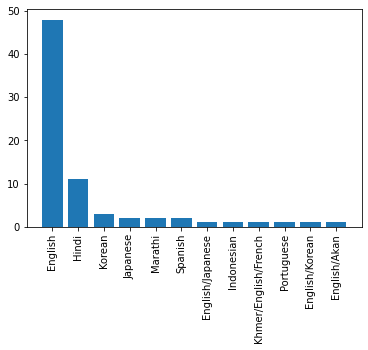

In [ ]:
# 1. Visualization about long-running movies to find which languages they belong to.
long_movies = netflix[netflix["Runtime"] >= 120]    # long-running movies = 120 min. (our criteria)
language = long_movies["Language"]                  # filtering long-running movies' language column
langcategory_nr = long_movies["Language"].value_counts().to_list()      # counting the languages and turning this information into a list
lang_categories = long_movies["Language"].value_counts().index.tolist() # turning the unique language information to a list
plt.bar(lang_categories, langcategory_nr) # creating a bar chart with these two lists
plt.xticks(range(len(lang_categories)), lang_categories, rotation='vertical')
plt.show()

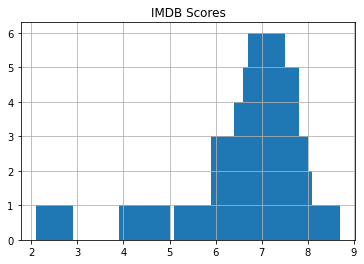

In [ ]:
# 2. Between 2019 January and 2020 June, finding the IMDB scores of Documentaries and creating a visualization.
netflix["n_Date"]=pd.to_datetime(netflix["Premiere"], errors='coerce')  # creating a new date column from the existed one
start_date = "2019-01-01" # creating a start date variable
end_date = "2020-06-30" # creating an end date variable

jan_to_june = (netflix["n_Date"] >= start_date) & (netflix["n_Date"] <= end_date) # filtering the data according to date (boolean)
netflix_jan_to_june = netflix.loc[jan_to_june] # according the boolean result, determining the values of the data
n_documentary = netflix_jan_to_june[netflix_jan_to_june["Genre"].str.contains("Documentary")] # filtering documentaries (there are double categories for some movies. so this method was chosen.)
documentary_nr = n_documentary["IMDB Score"].value_counts().to_list()  # counting the scores and turning this information into a list
documentary_categories = n_documentary["IMDB Score"].value_counts().index.tolist()  # turning the unique score information to a list
plt.bar(documentary_categories, documentary_nr)  # creating a bar chart with these two lists
plt.title("IMDB Scores")
plt.grid()
plt.show()

In [ ]:
# 3.Which genre has the highest IMDB score in English-language movies?
n_english = netflix[netflix["Language"].str.contains("English")] # filtering English language movies (there are double categories for some movies. so this method was chosen.)
n_english = n_english.sort_values(by=["IMDB Score"], ascending=False) # sorting these movies' scores in descending order
highest_imdb_genre = n_english.iloc[[0]]   # selecting the first one
print(highest_imdb_genre)   # Documentary has the highest score in English-language movies.

                                                Genre         Premiere  \
Title                                                                    
David Attenborough: A Life on Our Planet  Documentary  October 4, 2020   

                                          Runtime  IMDB Score Language  \
Title                                                                    
David Attenborough: A Life on Our Planet       83         9.0  English   

                                             n_Date  
Title                                                
David Attenborough: A Life on Our Planet 2020-10-04  


In [ ]:
# 4.What is the average runtime of Hindi-language movies?
n_hindi = netflix[netflix["Language"].str.contains("Hindi")]  # filtering Hindi language movies (there are double categories for some movies. so this method was chosen.)
hindi_avg_runtime = n_hindi["Runtime"].mean()  # finding the average of runtime
print(round(hindi_avg_runtime,2))  # average = 111.03 ((there are double categories for some movies. they are included.)

111.03


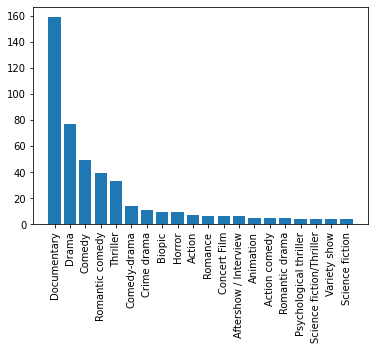

In [ ]:
# 5.How many categories does Genre column have and what are they?
total_genre_categories = netflix["Genre"].value_counts()  # total number of genre column

genre_categories = netflix["Genre"].value_counts().nlargest(20)  # movie categories - there are many, so first 20 of them were chosen for visualization.

genre_categories = netflix["Genre"].value_counts().nlargest(20).index.tolist() # creating a list of unique movie categories

genre_categories_nr = netflix["Genre"].value_counts().nlargest(20)  # category numbers - there are many, so first 20 of them were chosen for visualization.

genre_categories_nr = netflix["Genre"].value_counts().nlargest(20).tolist() # creating a list of categories' numbers

plt.bar(genre_categories, genre_categories_nr)   # creating a bar chart for first 20 categories
plt.xticks(range(len(genre_categories)), genre_categories, rotation='vertical')
plt.show()

In [ ]:
# 6.Find the 3 most used languages in the movies.
languages = netflix["Language"].value_counts()[0:3]  # Counting the values of language column and selecting first 3
print(languages)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


In [ ]:
# 7.What are the top 10 movies with the highest IMDB rating?
top_10_score = netflix.sort_values(by=["IMDB Score"], ascending=False)[0:10]   # ordering the movies according to IMDB scores and selecting first 10
print(top_10_score)

                                                                            Genre  \
Title                                                                               
David Attenborough: A Life on Our Planet                              Documentary   
Emicida: AmarElo - It's All For Yesterday                             Documentary   
Springsteen on Broadway                                              One-man show   
Winter on Fire: Ukraine's Fight for Freedom                           Documentary   
Taylor Swift: Reputation Stadium Tour                                Concert Film   
Ben Platt: Live from Radio City Music Hall                           Concert Film   
Dancing with the Birds                                                Documentary   
Cuba and the Cameraman                                                Documentary   
Klaus                                        Animation/Christmas/Comedy/Adventure   
13th                                                             

In [ ]:
# 8.What is the correlation between IMDB score and 'Runtime'?
netflix["Runtime"].corr(netflix["IMDB Score"])  # calculating the correlation

time_score_corr = px.scatter(netflix, x="IMDB Score", y="Runtime")    # creating a scatter plot
time_score_corr.update_layout(autosize=False, width=600, height=300)
time_score_corr.show()   # according to the visualization, there is no relationship between IMDB score and Runtime.

                                                                            Genre  \
Title                                                                               
David Attenborough: A Life on Our Planet                              Documentary   
Emicida: AmarElo - It's All For Yesterday                             Documentary   
Springsteen on Broadway                                              One-man show   
Winter on Fire: Ukraine's Fight for Freedom                           Documentary   
Taylor Swift: Reputation Stadium Tour                                Concert Film   
Ben Platt: Live from Radio City Music Hall                           Concert Film   
Dancing with the Birds                                                Documentary   
Cuba and the Cameraman                                                Documentary   
Klaus                                        Animation/Christmas/Comedy/Adventure   
13th                                                             

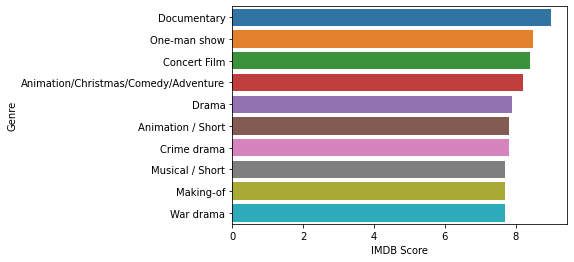

In [ ]:
# 9.Which are the top 10 'Genre' with the highest IMDB Score?
netflix.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10]
print(top_10_score)                # Grouping by Genre, sorting them in descending order, selecting the first 10
top_10_scores = netflix.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()

sns.barplot(y=top_10_scores["Genre"], x=top_10_scores["IMDB Score"])   # creating a bar plot
plt.show()

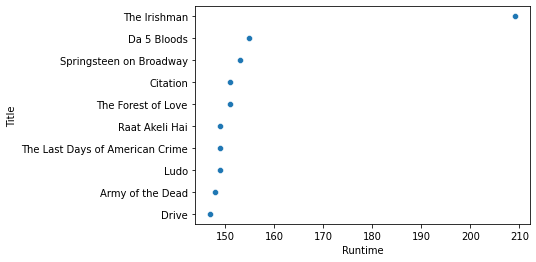

In [ ]:
# 10.What are the top 10 movies with the highest 'runtime'?
top_10_scatter = netflix.sort_values(["Runtime"], ascending=False)[0:10].reset_index()  # sorting data accordiing to runtime in descending order, selecting the first 10

sns.scatterplot(y=top_10_scatter["Title"], x=top_10_scatter["Runtime"])   # creating a scatter plot
plt.show()

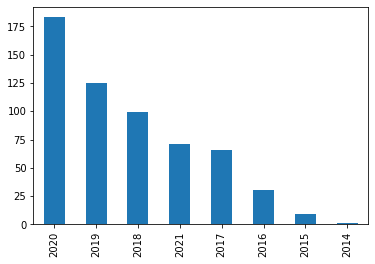

In [ ]:
# 11.In which year were the most movies released?
netflix['Year'] = netflix['n_Date'].dt.year    # getting the year information from the date column
netflix["Year"].value_counts().plot.bar()       # according to the bar chart, many movies were released in 2020.

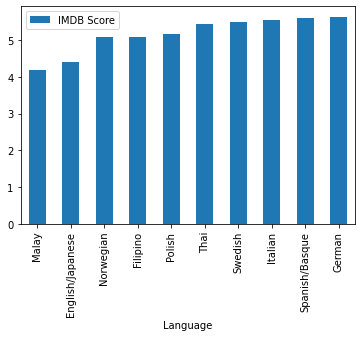

In [ ]:
# 12.Which languages have the lowest average IMDB rating?
x = netflix.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)[0:10].plot.bar()   # grouping by language, and calculating the average of IMDB scores

# according to the mean information, the lowest 10 groups were visualized.

In [ ]:
# 13.Which year has the greatest total runtime?
netflix.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)[0:1]

#Among the movies grouped by the year information, the year with the highest total runtime = 2020

,Runtime
Year,
2020,17384


In [ ]:
# 14.What is the "Genre" where each language is used the most?
netflix.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)   # The dataframe is grouped by language and type, the max numbers were selected.


Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In [ ]:
# 15.Is there any outlier data in the data set? (PART 1)
if_outliers = px.box(netflix, y="Runtime")
if_outliers.update_layout(autosize=False, width=800, height=400)
if_outliers.show()              # according to the boxplot by "runtime", many outliers are observed in the data set.

In [ ]:
# 15.Is there any outlier data in the data set? (PART 2)
if_outliers = px.box(netflix, y="IMDB Score")
if_outliers.update_layout(autosize=False, width=800, height=400)
if_outliers.show()                # according to the boxplot by "IMDB Score", outliers are observed in the data set. However, its number is less than the runtime outlier graph.